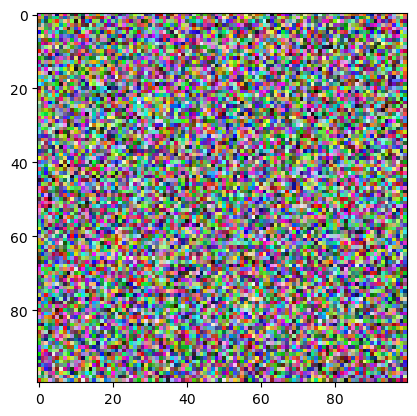

In [1]:
# Used to change filepaths
from pathlib import Path
# We set up matplotlib, pandas, and the display function
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
# import numpy to use in this cell
import numpy as np
# import Image from PIL so we can use it later
from PIL import Image
# generate test_data
test_data = np.random.beta(1, 1, size=(100, 100, 3))
# display the test_data
plt.imshow(test_data)

The image size is: (100, 100)


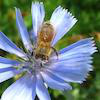

In [6]:
# open the image
img = Image.open(r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_12.jpg")

# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))
# Just having the image as the last line in the cell will display it in the notebook
img

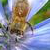

In [9]:
# Crop the image to 25, 25, 75, 75
img_cropped = img.crop([25, 25, 75, 75])
display(img_cropped)

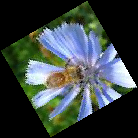

In [13]:
# rotate the image by 45 degrees
img_rotated = img.rotate(120, expand=25)
display(img_rotated)

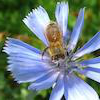

In [14]:
# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Our NumPy array has the shape: (100, 100, 3)


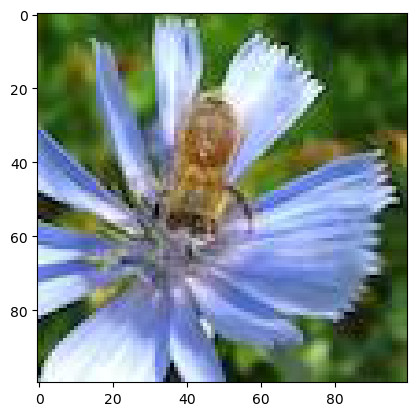

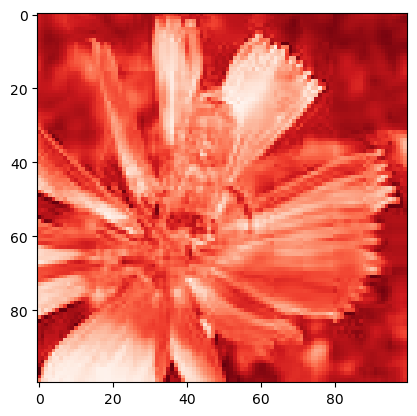

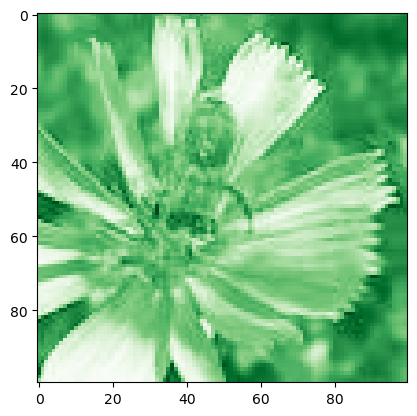

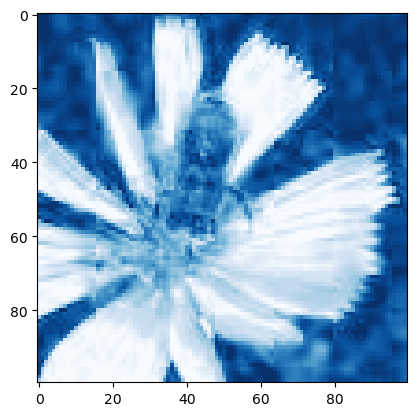

In [17]:
# Turn our image object into a NumPy array
img_data = np.array(img)
img_data
# get the shape of the resulting array
img_data_shape = img_data.shape
print("Our NumPy array has the shape: {}".format(img_data_shape))

# plot the data with `imshow`
plt.imshow(img_data)
plt.show()

# plot the red channel
plt.imshow(img_data[:, :, 0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:, :, 1], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:, :, 2], cmap=plt.cm.Blues_r)
plt.show()

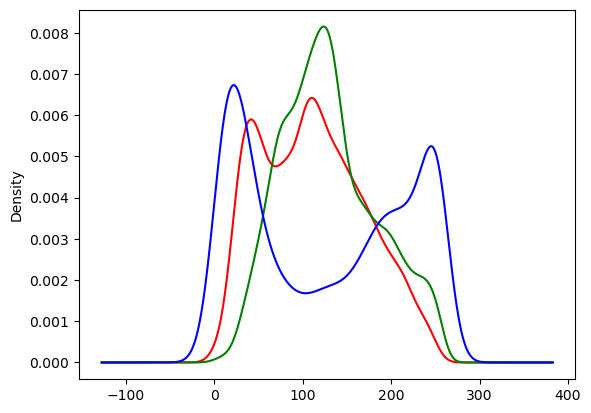

In [18]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:, :, ix], color)
        
    plt.show()

plot_rgb(img_data)

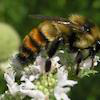

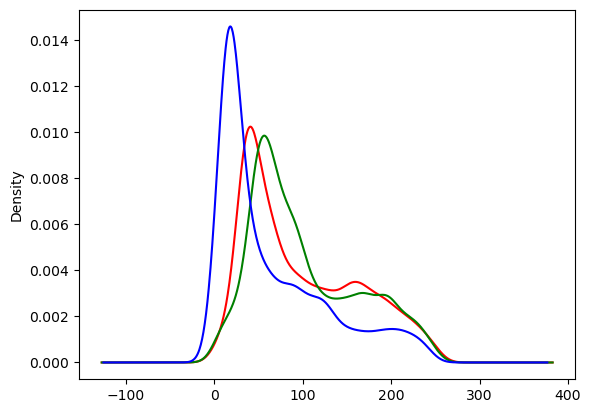

In [20]:
# load bee_12.jpg as honey
honey = Image.open(r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_1.jpg")
# display the honey bee image
display(honey)
# NumPy array of the honey bee image data
honey_data = np.array(honey)
# plot the rgb densities for the honey bee image
plot_rgb(honey_data)

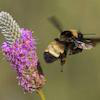

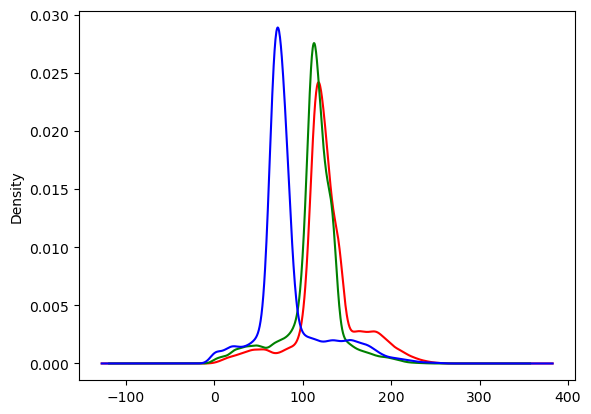

In [22]:
# load bee_3.jpg as bumble
bumble = Image.open(r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_3.jpg")
# display the bumble bee image
display(bumble)
# NumPy array of the bumble bee image data
bumble_data = np.array(bumble)
# plot the rgb densities for the bumble bee image
plot_rgb(bumble_data)

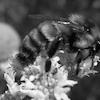

Our NumPy array has the shape: (100, 100)


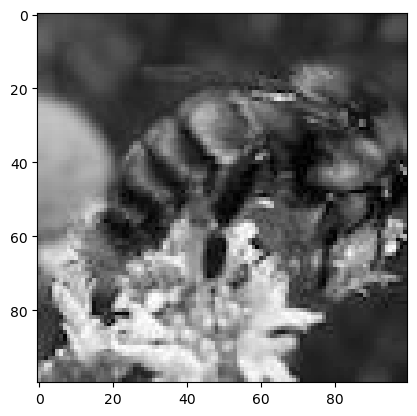

<Axes: ylabel='Density'>

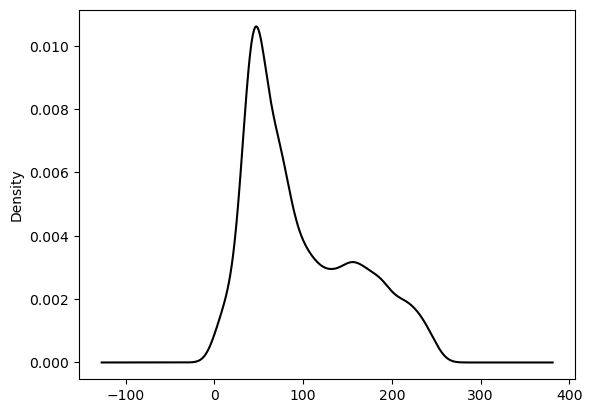

In [23]:
# convert to grayscale
honey_bw = honey.convert("L")
display(honey_bw)

# convert the image to a NumPy array
honey_bw_arr = np.array(honey_bw)

# get the shape of the resulting array
honey_bw_arr_shape = honey_bw_arr.shape
print("Our NumPy array has the shape: {}".format(honey_bw_arr_shape))

# plot the array using matplotlib
plt.imshow(honey_bw_arr, cmap=plt.cm.gray)
plt.show()

# plot the kde of the new black and white array
plot_kde(honey_bw_arr, 'k')

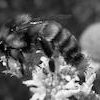

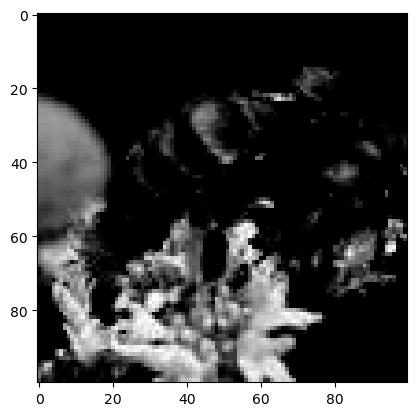

In [25]:
# flip the image left-right with transpose
honey_bw_flip = honey_bw.transpose(Image.FLIP_LEFT_RIGHT)

# show the flipped image
display(honey_bw_flip)

# save the flipped image
honey_bw_flip.save(r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bw_flipped.jpg")

# create higher contrast by reducing range
honey_hc_arr = np.maximum(honey_bw_arr, 100)

# show the higher contrast version
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image
honey_bw_hc = Image.fromarray(honey_hc_arr)

# save the high contrast version
honey_bw_hc.save(r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bw_hc.jpg")

In [27]:
image_paths = [r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_1.jpg", 
               r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_2.jpg", 
               r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_3.jpg", 
               r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_12.jpg"]

def process_image(path):
    img = Image.open(path)

    # create paths to save files to
    bw_path = r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\{}.jpg".format(path.stem)
    rcz_path = r"C:\Users\excel\DATA Science\DATAset2\Honey_bees\{}.jpg".format(path.stem)

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert("L")
    bw.save(bw_path)
    
    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = bw.rotate(45).crop([25, 25, 75, 75]).resize((100, 100))
    rcz.save(rcz_path)

# for loop over image paths
for img_path in image_paths:
    process_image(Path(img_path))

Creating grayscale version of C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_1.jpg and saving to C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_1.jpg.
Creating rotated, cropped, and zoomed version of C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_1.jpg and saving to C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_1.jpg.
Creating grayscale version of C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_2.jpg and saving to C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_2.jpg.
Creating rotated, cropped, and zoomed version of C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_2.jpg and saving to C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_2.jpg.
Creating grayscale version of C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_3.jpg and saving to C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_3.jpg.
Creating rotated, cropped, and zoomed version of C:\Users\excel\DATA Science\DATAset2\Honey_bees\bee_3.jpg and saving to C:\Users\excel\DATA Science\DATAset2

# ML- Predict Species from Images

In [ ]:
# used to change filepaths
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

# import Image from PIL
from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2gray

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split

# import SVC from sklearn's svm module
from sklearn.svm import SVC

# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score

In [ ]:
# load the labels using pandas
labels = pd.read_csv(r"C:\Users\excel\DATA Science\Datasets\Honey_bees\labels.csv", index_col=0)

# show the first five rows of the dataframe using head
display(labels.head())

def get_image(row_id, root=r"C:\Users\excel\DATA Science\Datasets\Honey_bees\images"):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

# subset the dataframe to just Apis (genus is 0.0) get the value of the sixth item in the index
apis_row = labels[labels.genus == 0.0].index[5]

# show the corresponding image of an Apis
plt.imshow(get_image(apis_row))
plt.show()

# subset the dataframe to just Bombus (genus is 1.0) get the value of the sixth item in the index
bombus_row = labels[labels.genus == 1.0].index[5]

# show the corresponding image of a Bombus
plt.imshow(get_image(bombus_row))
plt.show()

In [ ]:
# load a bombus image using our get_image function and bombus_row from the previous cell
bombus = get_image(bombus_row)

# print the shape of the bombus image
print('Color bombus image has shape: ', bombus.shape)

# convert the bombus image to grayscale
gray_bombus = rgb2gray(bombus)

# show the grayscale image
plt.imshow(gray_bombus, cmap=mpl.cm.gray)

# confirm grayscale bombus image only has one channel
print('Grayscale bombus image has shape: ', gray_bombus.shape)

In [ ]:
# run HOG using our grayscale bombus image
hog_features, hog_image = hog(gray_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a gray colormap
plt.imshow(hog_image, cmap=mpl.cm.gray)

In [ ]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to grayscale
    gray_image = rgb2gray(img)
    # get HOG features from grayscale image
    hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack([color_features, hog_features])
    return flat_features

bombus_features = create_features(bombus)

# print shape of bombus_features
bombus_features.shape

In [ ]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        # load image
        img = get_image(img_id)
        # get features
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)

In [ ]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix,
                                                    labels.genus.values,
                                                    test_size=.3,
                                                    random_state=1234123)

# look at the distribution of labels in the train set
pd.Series(y_train).value_counts()

In [ ]:
# get shape of our training features
print('Training features matrix shape is: ', X_train.shape)

# define standard scaler
ss = StandardScaler()

# fit the scaler and transform the training features
train_stand = ss.fit_transform(X_train)

# use fit_transform to run PCA on our standardized training features
test_stand = ss.transform(X_test)

# look at the new shape of the standardized feature matrices
print('Standardized training features matrix shape is: ', train_stand.shape)
print('Standardized test features matrix shape is: ', test_stand.shape)

In [ ]:
# Instantiate a PCA object with 350 components
pca = PCA(n_components=350)

# use fit_transform on our standardized training features
X_train = pca.fit_transform(train_stand)

# use transform on our standardized test features
X_test = pca.transform(test_stand)

# look at the new shape of the transformed matrices
print('Training features matrix is: ', X_train.shape)
print('Test features matrix is: ', X_test.shape)

In [ ]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

In [ ]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

# Deep Learning with Images

In [ ]:
import pickle
from pathlib import Path
from skimage import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# import keras library
import keras

# import Sequential from the keras models module
from keras.models import Sequential

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
# load labels.csv from datasets folder using pandas
labels = pd.read_csv(r"C:\Users\excel\DATA Science\Datasets\Honey_bees\labels.csv", index_col=0)

# print value counts for genus
print(labels.genus.value_counts())

# assign the genus label values to y
y = labels.genus.values

In [ ]:
# create empty list
image_list = []

for i in labels.index:
    # load image
    img = io.imread(r"C:\Users\excel\DATA Science\Datasets\Honey_bees\images\{}.jpg".format(i)).astype(np.float64)
        
    # append to list of all images
    image_list.append(img)
    
# convert image list to single array
X = np.array(image_list)

print(X.shape)

In [ ]:
# split out evaluation sets (x_eval and y_eval)
x_interim, x_eval, y_interim, y_eval = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=52)

# split remaining data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_interim, 
                                                    y_interim, 
                                                    test_size=0.4, 
                                                    random_state=52)

# examine number of samples in train, test, and validation sets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_eval.shape[0], 'eval samples')

In [ ]:
# initialize standard scaler
ss = StandardScaler()

def scale_features(train_features, test_features):
    for image in train_features:
        # for each channel, apply standard scaler's fit_transform method
        for channel in range(image.shape[2]):
            image[:, :, channel] = ss.fit_transform(image[:, :, channel])
    for image in test_features:
        # for each channel, apply standard scaler's transform method
        for channel in range(image.shape[2]):
            image[:, :, channel] = ss.transform(image[:, :, channel])

# apply scale_features to four sets of features
scale_features(x_interim, x_eval)
scale_features(x_train, x_test)

In [ ]:
# set model constants
num_classes = 1

# define model as Sequential
model = Sequential()

# first convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))

# add a second 2D convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

In [ ]:
# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# third convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))

# add additional dropout to prevent overfitting
model.add(Dropout(0.5))

# prediction layers
model.add(Dense(num_classes, activation='sigmoid', name='preds'))

# show model summary
model.summary()

In [ ]:
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)

# mock-train the model using the first ten observations of the train and test sets
model.fit(
    x_train,
    y_train,
    epochs=5,
    verbose=1,
    validation_data=(x_test, y_test)
)

In [ ]:
model.save(r"C:\Users\excel\DATA Science\Datasets\Honey_bees\bees_trained.keras")

In [ ]:
# load pre-trained model
pretrained_cnn = keras.models.load_model(r"C:\Users\excel\DATA Science\Datasets\Honey_bees\bees_trained.keras")

# evaluate model on test set
score = pretrained_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("")

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(x_eval, y_eval, verbose=0)
# print loss score
print('Eval loss:', eval_score[0])
# print accuracy score
print('Eval accuracy:', eval_score[1])

In [ ]:
# load history
with open(r"C:\Users\excel\DATA Science\Datasets\Honey_bees\model_history.pkl", 'rb') as f:
    pretrained_cnn_history = pickle.load(f)

# print keys for pretrained_cnn_history dict
print(pretrained_cnn_history.keys())

fig = plt.figure(1)
plt.subplot(211)
# plot the validation accuracy
plt.plot(pretrained_cnn_history['val_acc'])
plt.title('Validation accuracy and loss')
plt.ylabel('Accuracy')
plt.subplot(212)
# plot the validation loss
plt.plot(pretrained_cnn_history['val_loss'], 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss value');

In [ ]:
# predicted probabilities for x_eval
y_proba = pretrained_cnn.predict(x_eval)

print("First five probabilities:")
print(y_proba[:5])
print("")

# predicted classes for x_eval
y_pred = np.round(y_proba).astype('int')

print("First five class predictions:")
print(y_pred[:5])
print("")